# 1. Linear Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
SEED = 42
POLY_DEGREE = 3
SAMPLES = 10
np.random.seed(SEED)

Assume that the (unknown) target function is

$y = f(x) = 1.0 + 0.5\times x$

## 1.1 Create a simple training dataset

In [4]:
N = SAMPLES
np.random.seed(SEED)
X_train = 3.0 * np.random.rand(N,1)  # Create N random numbers ~ uniform distribution U(0,3)
y_train = 1.0 + 0.5*X_train

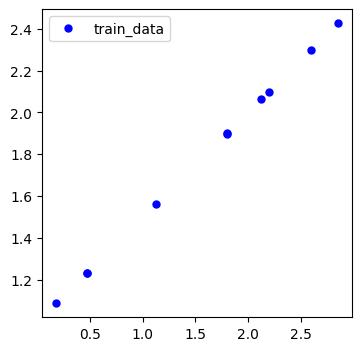

In [5]:
plt.figure(figsize=(4, 4))
plt.plot(X_train, y_train, 'b.', markersize=10, label='train_data')
plt.legend()
plt.show()

To simulate the fact that collected data in practice usually contain certain noises, we add some noises to the generated target values.

$y=f(x)=1.0+0.5\times x + \varepsilon$

In [6]:
np.random.seed(SEED)
# randn(N,1): Create N random numbers ~ standard normal distribution Gaussian(0,1)
# Multiply by 0.5 to reduce standard deviation to 0.5
X_train = 3.0*np.random.rand(N, 1)
y_train = 1.0 + 0.5*X_train + np.random.randn(N,1) * 0.5

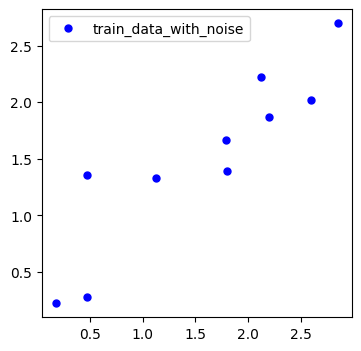

In [7]:
plt.figure(figsize=(4, 4))
plt.plot(X_train, y_train, 'b.', markersize=10, label='train_data_with_noise')
plt.legend()
plt.show()

## 1.2 Implement linear regression model

In [8]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [9]:
# Create some data for plotting
X_new = np.linspace(0, 3, 100).reshape(100, 1) # 100 points in [0, 3] equally spaced

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_for_plotting = linear_model.predict(X_new)

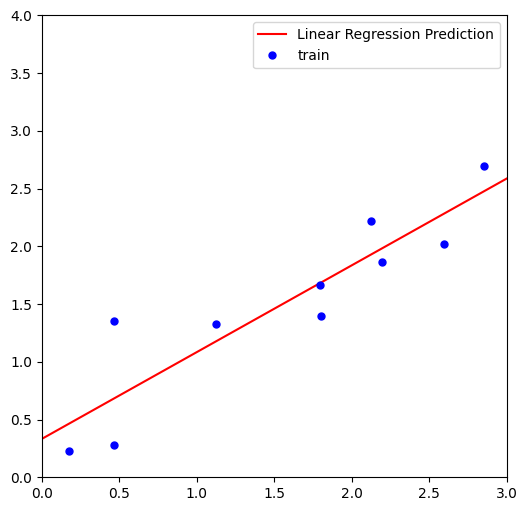

Linear Regression intercept and coefficients:
Intercept: 0.33181066071854115
Coefficient: 0.7515562201137193
Training loss:  0.09991531905633781


In [11]:
plt.figure(figsize=(6, 6))
plt.plot(X_new, y_pred_for_plotting, 'r-', ms=10, label='Linear Regression Prediction')
plt.plot(X_train,y_train,'b.', ms=10, label='train')
plt.axis([0, 3, 0, 4])
plt.legend()
plt.show()

print(f"Linear Regression intercept and coefficients:")
print(f"Intercept: {linear_model.intercept_[0]}")
print(f"Coefficient: {linear_model.coef_[0][0]}")
print(f'Training loss: ', mean_squared_error(y_train, linear_model.predict(X_train)))

In [12]:
for x, y in zip(X_train, y_train):
    print(f'X_train: {x}, y_train: {y}')

X_train: [1.12362036], y_train: [1.32707299]
X_train: [2.85214292], y_train: [2.69735148]
X_train: [2.19598183], y_train: [1.86628207]
X_train: [1.79597545], y_train: [1.66512285]
X_train: [0.46805592], y_train: [1.3550091]
X_train: [0.46798356], y_train: [0.27735166]
X_train: [0.17425084], y_train: [0.2246665]
X_train: [2.59852844], y_train: [2.01812045]
X_train: [1.80334504], y_train: [1.39525696]
X_train: [2.12421773], y_train: [2.21923253]


## 1.3 Test current model on test data

Note: The purpose of X_new is to create a smooth curve for plotting the predictions of the linear regression model

### 1.3.1 Creating test data

In [13]:
N_test = SAMPLES
X_test = 3.0 * np.random.rand(N_test, 1)
y_test = 1.0 + 0.5 * X_test + np.random.randn(N_test, 1) * 0.5

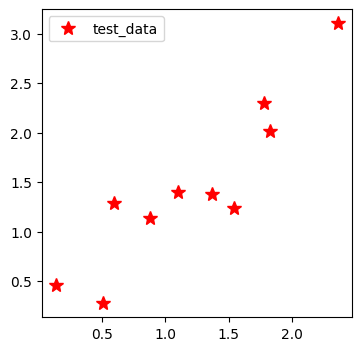

In [14]:
plt.figure(figsize=(4, 4))
plt.plot(X_test, y_test, 'r*', ms=10, label='test_data')
plt.legend()
plt.show()

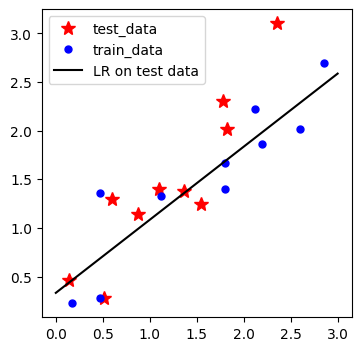

In [15]:
plt.figure(figsize=(4, 4))
plt.plot(X_test, y_test, 'r*', ms=10, label='test_data')
plt.plot(X_train, y_train, 'b.', ms=10, label='train_data')
plt.plot(X_new, linear_model.predict(X_new), 'k-', ms=10, label='LR on test data')
plt.legend()
plt.show()

In [16]:
print(f'Training loss: ', mean_squared_error(y_train, linear_model.predict(X_train)))
print(f'Test loss:', mean_squared_error(y_test, linear_model.predict(X_test)))

Training loss:  0.09991531905633781
Test loss: 0.21020128681013045


# 2. Polynomial Regression

Linear Regression section: The equation being modeled is f(x) = 1.0 + 0.5 * x

In this `Polynomial Regression` section, the code transforms the input `x` into polynomial features, for each x value, we have x, $x^2$, $x^3$

The model then fits a linear regression on these polynomial features.

$f(x) = w_0 + w_1x + w_2x^2 + w_3x^3$

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + w_3x^3 + \ldots + w_Dx^D$

In [17]:
degree = POLY_DEGREE # 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_new_poly = poly_features.transform(X_new)

In [18]:
print(f'X_train original \n\n{X_train}')

X_train original 

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]]


In [19]:
print(f'X_train_poly after polynomial feature transformation \n\n {X_train_poly}')

X_train_poly after polynomial feature transformation 

 [[1.12362036e+00 1.26252271e+00 1.41859621e+00]
 [2.85214292e+00 8.13471923e+00 2.32013819e+01]
 [2.19598183e+00 4.82233618e+00 1.05897626e+01]
 [1.79597545e+00 3.22552783e+00 5.79296880e+00]
 [4.68055921e-01 2.19076345e-01 1.02539981e-01]
 [4.67983561e-01 2.19008613e-01 1.02492431e-01]
 [1.74250837e-01 3.03633540e-02 5.29083984e-03]
 [2.59852844e+00 6.75235004e+00 1.75461736e+01]
 [1.80334504e+00 3.25205332e+00 5.86457420e+00]
 [2.12421773e+00 4.51230098e+00 9.58510976e+00]]


In [20]:
poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The prediction correspond to the original `x` values in `X_new`.

`X_new_poly` is just the polynomial features transformation of `X_new`.

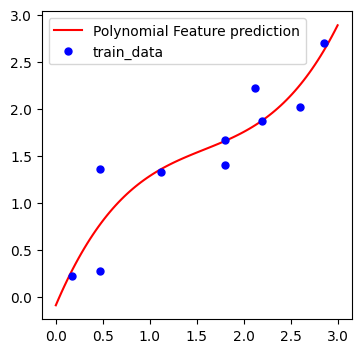

In [21]:
y_pred_x_new_poly = poly_linear_model.predict(X_new_poly)
plt.figure(figsize=(4, 4))
plt.plot(X_new, y_pred_x_new_poly, 'r-', ms=10, label='Polynomial Feature prediction')
plt.plot(X_train, y_train, 'b.', ms=10, label='train_data')
plt.legend()
plt.show()

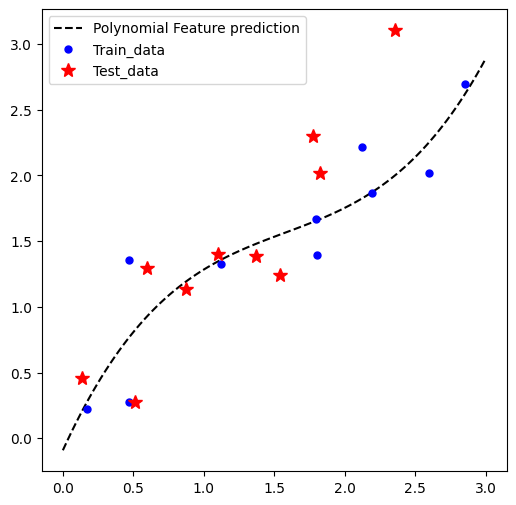

Training loss: 0.08750190066671257
Test loss: 0.23747048298743456


In [22]:
plt.figure(figsize=(6, 6))
plt.plot(X_new, poly_linear_model.predict(X_new_poly), 'k--', ms=10, label='Polynomial Feature prediction')
plt.plot(X_train, y_train, 'b.', ms=10, label='Train_data')
plt.plot(X_test, y_test, 'r*', ms=10, label='Test_data')
plt.legend()
plt.show()

print(f'Training loss: {mean_squared_error(y_train, poly_linear_model.predict(X_train_poly))}')
print(f'Test loss: {mean_squared_error(y_test, poly_linear_model.predict(poly_features.transform(X_test)))}')

## 2.1 Test on poly 7 degrees

In [23]:
degree_2 = 10
poly_features_2 = PolynomialFeatures(degree=degree_2, include_bias=False)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
X_new_poly_2 = poly_features_2.transform(X_new)
X_test_poly_2 = poly_features_2.transform(X_test)
poly_linear_model_2 = LinearRegression()
poly_linear_model_2.fit(X_train_poly_2, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


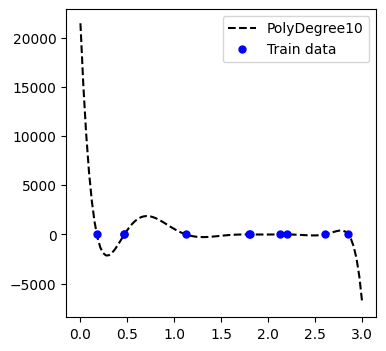

In [24]:
plt.figure(figsize=(4, 4))
plt.plot(X_new, poly_linear_model_2.predict(X_new_poly_2), 'k--', ms=10, label='PolyDegree10')
plt.plot(X_train, y_train, 'b.', ms=10, label='Train data')
plt.legend()
plt.show()

### Closer look at the overfitting

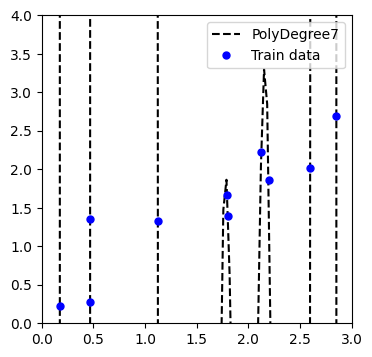

In [25]:
plt.figure(figsize=(4, 4))
plt.plot(X_new, poly_linear_model_2.predict(X_new_poly_2), 'k--', ms=10, label='PolyDegree7')
plt.plot(X_train, y_train, 'b.', ms=10, label='Train data')
plt.axis([0, 3, 0, 4])
plt.legend()
plt.show()

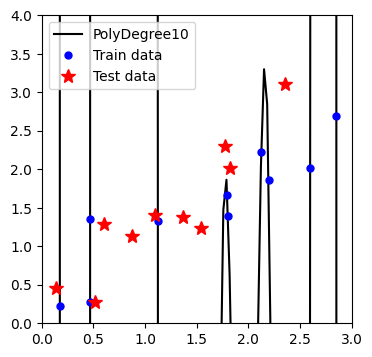

--------------------------------------------------
Training loss: 7.423055028732834e-13
Test loss: 832768.1690291029
Based on the image, model fit perfectly on training set but performed poorly on test set. This is a classic case of overfitting.
Also based on loss values, loss on test set increased significantly compared to training set.


In [26]:
plt.figure(figsize=(4, 4))
plt.plot(X_new, poly_linear_model_2.predict(X_new_poly_2), 'k-', ms=10, label='PolyDegree10')
plt.plot(X_train, y_train, 'b.', ms=10, label='Train data')
plt.plot(X_test, y_test, 'r*', ms=10, label='Test data')
plt.legend()
plt.axis([0, 3, 0, 4])
plt.show()

print('--------------------------------------------------')
print(f'Training loss: {mean_squared_error(y_train, poly_linear_model_2.predict(X_train_poly_2))}')
print(f'Test loss: {mean_squared_error(y_test, poly_linear_model_2.predict(X_test_poly_2))}')
print(f'Based on the image, model fit perfectly on training set but performed poorly on test set. This is a classic case of overfitting.')
print(f'Also based on loss values, loss on test set increased significantly compared to training set.')

So basically this model achieved very low training loss but high test loss, we need to test the model on a different dataset even when the training loss is low because of this reason.


# 3. Ridge Regularization (L2 norm)

Ridge Regression: Weight Decay

$\texttt{prediction} = w_0 + w_1x + w_2x^2 + \ldots + w_Dx^D$ (However $w_1, w_2,\ldots, w_D$ will have small values close to 0.0).

$w_{map} = \arg\min_{w} L(w) + \lambda\Vert w\Vert^2_2$


$\lambda\Vert w\Vert^2_2$: Regularziation term, and $\lambda$ is the regularization strength.

## 3.1 Ridge Regression

Ridge Regression is a variation of Linear Regression that adds a regularization term to the loss function.

This regularization term penalizes large coefficients in the model, helping to prevent overfitting, especially in case when the model is complex (e.g., high-degree polynomial features).

In [27]:
from sklearn.linear_model import Ridge, Lasso

In [28]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_loss = mean_squared_error(y_train, model.predict(X_train))
    test_loss = mean_squared_error(y_test, model.predict(X_test))
    print(f'-----------------Results-----------------')
    print(f'Training loss: {train_loss}')
    print(f'Test loss: {test_loss}')

Original linear model results:
-----------------Results-----------------
Training loss: 0.09991531905633781
Test loss: 0.21020128681013045

Linear model with polynomial features degree 7 results:
-----------------Results-----------------
Training loss: 0.0632241895367043
Test loss: 5.957556905354913

Ridge regularization (lambda=0.5) with polynomial features degree 7 results:
-----------------Results-----------------
Training loss: 0.10055270022175233
Test loss: 0.24571070595311673

Ridge regularization (lambda=10) with polynomial features degree 7 results:
-----------------Results-----------------
Training loss: 0.11734823049849688
Test loss: 0.26989831055988905

Ridge regularization (lambda=100000) with polynomial features degree 7 results:
-----------------Results-----------------
Training loss: 0.2784644759333471
Test loss: 0.521948755879768

Ridge regularization (lambda=1e-05) with polynomial features degree 7 results:
-----------------Results-----------------
Training loss: 0.070

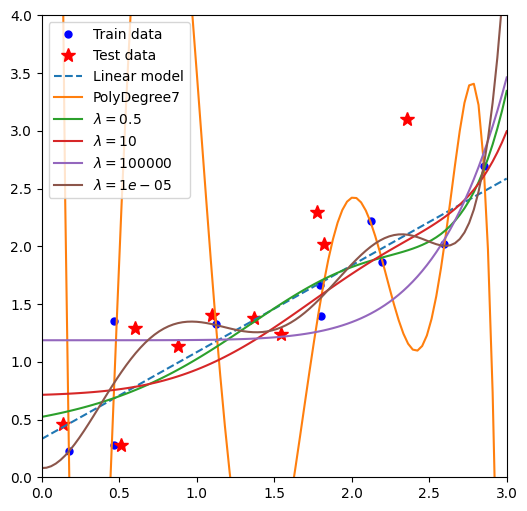

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(X_train, y_train, 'b.', ms=10, label='Train data')
plt.plot(X_test, y_test, 'r*', ms=10, label='Test data')
plt.axis([0, 3, 0, 4])

# Polynomial features degree 7, X_train transformed to degree 7 and X_new transformed to degree 7
poly_features7 = PolynomialFeatures(degree=7, include_bias=False)
X_train_poly7 = poly_features7.fit_transform(X_train)
X_new_poly7 = poly_features7.transform(X_new)

# Original linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
plt.plot(X_new, linear_model.predict(X_new), '--', ms=10, label='Linear model')
print('Original linear model results:')
evaluate_model(linear_model, X_train, y_train, X_test, y_test)

# Original linear model with polynomial features degree 7
poly_linear_model_7 = LinearRegression()
poly_linear_model_7.fit(X_train_poly7, y_train)
plt.plot(X_new, poly_linear_model_7.predict(X_new_poly7), '-', ms=10, label='PolyDegree7')
print('\nLinear model with polynomial features degree 7 results:')
evaluate_model(poly_linear_model_7, X_train_poly7, y_train, poly_features7.transform(X_test), y_test)

# Ridge regularization with polynomial features degree 7
lamda = 0.5
poly_ridge_7 = Ridge(alpha=lamda)
poly_ridge_7.fit(X_train_poly7, y_train)
plt.plot(X_new, poly_ridge_7.predict(X_new_poly7), '-', ms=10, label='$\\lambda={}$'.format(lamda))
print(f'\nRidge regularization (lambda={lamda}) with polynomial features degree 7 results:')
evaluate_model(poly_ridge_7, X_train_poly7, y_train, poly_features7.transform(X_test), y_test)

# Ridge with lamda = 10
lamda = 10
poly_ridge_7 = Ridge(alpha=lamda)
poly_ridge_7.fit(X_train_poly7, y_train)
plt.plot(X_new, poly_ridge_7.predict(X_new_poly7), '-', ms=10, label='$\\lambda={}$'.format(lamda))
print(f'\nRidge regularization (lambda={lamda}) with polynomial features degree 7 results:')
evaluate_model(poly_ridge_7, X_train_poly7, y_train, poly_features7.transform(X_test), y_test)

# Ridge with lamda = 100000
lamda = 100000
poly_ridge_7 = Ridge(alpha=lamda)
poly_ridge_7.fit(X_train_poly7, y_train)
plt.plot(X_new, poly_ridge_7.predict(X_new_poly7), '-', ms=10, label='$\\lambda={}$'.format(lamda))
print(f'\nRidge regularization (lambda={lamda}) with polynomial features degree 7 results:')
evaluate_model(poly_ridge_7, X_train_poly7, y_train, poly_features7.transform(X_test), y_test)

# Ridge with lamda = 10^-5
lamda = 10**-5
poly_ridge_7 = Ridge(alpha=lamda)
poly_ridge_7.fit(X_train_poly7, y_train)
plt.plot(X_new, poly_ridge_7.predict(X_new_poly7), '-', ms=10, label='$\\lambda={}$'.format(lamda))
print(f'\nRidge regularization (lambda={lamda}) with polynomial features degree 7 results:')
evaluate_model(poly_ridge_7, X_train_poly7, y_train, poly_features7.transform(X_test), y_test)

plt.legend()
plt.show()


# 4. LASSO Regularization

In [32]:
from sklearn.linear_model import Lasso


Lasso regularization (lambda=1e-05) with polynomial features degree 7 results:
-----------------Results-----------------
Training loss: 0.08864843807187314
Test loss: 0.23542189652711504

Original linear model results:
-----------------Results-----------------
Training loss: 0.09991531905633781
Test loss: 0.21020128681013045


d:\apps\anaconda\envs\aio_ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.429e-01, tolerance: 5.564e-04
  model = cd_fast.enet_coordinate_descent(


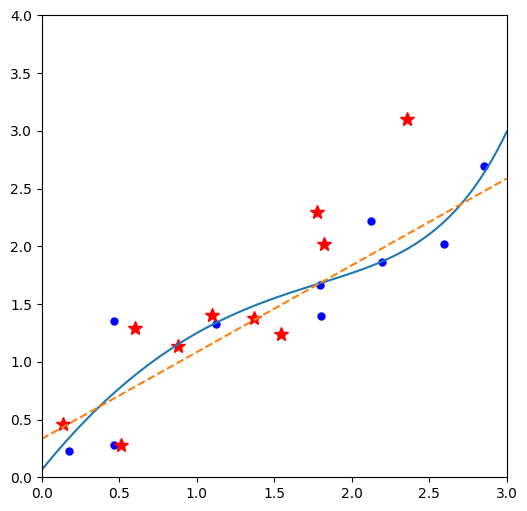

In [35]:
plt.figure(figsize=(6, 6))
plt.plot(X_train, y_train, 'b.', ms=10, label='Train data')
plt.plot(X_test, y_test, 'r*', ms=10, label='Test data')
plt.axis([0, 3, 0, 4])

X_new_poly7 = poly_features7.transform(X_new)

# Lasso regularization with polynomial features degree 7
lamda = 10**-5
lasso_reg_7 = Lasso(alpha=lamda)
lasso_reg_7.fit(X_train_poly7, y_train)
plt.plot(X_new, lasso_reg_7.predict(X_new_poly7), '-', ms=10, label='$\\lambda={}$'.format(lamda))
print(f'\nLasso regularization (lambda={lamda}) with polynomial features degree 7 results:')
evaluate_model(lasso_reg_7, X_train_poly7, y_train, poly_features7.transform(X_test), y_test)

# Original Linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
plt.plot(X_new, linear_model.predict(X_new), '--', ms=10, label='Linear model')
print('\nOriginal linear model results:')
evaluate_model(linear_model, X_train, y_train, X_test, y_test)